In [227]:
%matplotlib inline
from sklearn import neighbors
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn import decomposition
import scipy
import sklearn
import spacy
from sklearn.model_selection import train_test_split
import re
import os
import gensim
from gensim.models import word2vec
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from nltk.corpus import gutenberg, stopwords
from collections import Counter
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/bbc_text/business') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/bbc_text/business'

# NLP for scientific articles
This project is aimes at clustering scientific articles.

## Why are we interested?
There is so much scientific information online and countless resources to gain insights into scientific problems that I wanted to create a way to organize information based topic. This will help take disjointed information on the same topic and build resource databases

## Why this dataset?
Science is one of the fields where I believe data science can dramatically increase productivity and discovery by consolidating information and making it easier to access. I also wanted to create a model that succeeds in clustering articles within the same field.

## What are we trying to achieve?

The goal is to create a filter for articles and/or scientific documentation that can be used to unify scientific information. Once this model is successful it would make sense to create sub categories within the parent categories and continue to do so until we can easily access specific topics.

In [228]:
# Getting 100 unique article names
business_text_list = []
for x in range(511):
    y = "00" + str(x) + ".txt"
    business_text_list.append(y)
business_text_list_c = []
for x in business_text_list:
    if len(x) == 9:
        x = x[2:]
        business_text_list_c.append(x)
    elif len(x) == 8:
        x = x[1:]
        business_text_list_c.append(x)
    elif len(x) == 7:
        business_text_list_c.append(x)
# Adjust list because there is no article '0'
business_text_list_c = business_text_list_c[1:]
print(business_text_list_c)

['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.txt'

In [229]:
# All articles are from https://www.sciencenews.org
# Load Test
f = open("001.txt", "r")
f = f.read()
print(f)

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL

In [230]:
# Reading in all articles
business_article_list = []
for x in business_text_list_c:
    f = open(x, "r")
    f = f.read()
    business_article_list.append(f)
print(business_article_list[:10])
len(business_article_list)

['Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

510

In [231]:
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/bbc_text/entertainment') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/bbc_text/entertainment'

In [232]:
entertainment_text_list = []
for x in range(387):
    y = "00" + str(x) + ".txt"
    entertainment_text_list.append(y)
entertainment_text_list_c = []
for x in entertainment_text_list:
    if len(x) == 9:
        x = x[2:]
        entertainment_text_list_c.append(x)
    elif len(x) == 8:
        x = x[1:]
        entertainment_text_list_c.append(x)
    elif len(x) == 7:
        entertainment_text_list_c.append(x)
# Adjust list because there is no article '0'
entertainment_text_list_c = entertainment_text_list_c[1:]
print(entertainment_text_list_c)
len(entertainment_text_list)

['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.txt'

387

In [233]:
entertainment_article_list = []
for x in entertainment_text_list_c:
    f = open(x, "r")
    f = f.read()
    entertainment_article_list.append(f)
print(entertainment_article_list[:10])

['Gallery unveils interactive tree\n\nA Christmas tree that can receive text messages has been unveiled at London\'s Tate Britain art gallery.\n\nThe spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate. The messages will be "unwrapped" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs. It is the 17th year that the gallery has invited an artist to dress their Christmas tree. Artists who have decorated the Tate tree in previous years include Tracey Emin in 2002.\n\nThe plain green Norway spruce is displayed in the gallery\'s foyer. Its light bulb adornments are dimmed, ordinary domestic ones joined together with string. The plates decorating the branches will be auctioned off for the children\'s charity ArtWorks. Wentworth worked as an assistant to sculptor Henry Moore in the late 1960s. His reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during t

In [234]:
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/bbc_text/politics') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/bbc_text/politics'

In [235]:
politics_text_list = []
for x in range(418):
    y = "00" + str(x) + ".txt"
    politics_text_list.append(y)
politics_text_list_c = []
for x in politics_text_list:
    if len(x) == 9:
        x = x[2:]
        politics_text_list_c.append(x)
    elif len(x) == 8:
        x = x[1:]
        politics_text_list_c.append(x)
    elif len(x) == 7:
        politics_text_list_c.append(x)
# Adjust list because there is no article '0'
politics_text_list_c = politics_text_list_c[1:]
print(politics_text_list_c)
len(politics_text_list)

['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.txt'

418

In [236]:
politics_article_list = []
for x in politics_text_list_c:
    f = open(x, "r")
    f = f.read()
    politics_article_list.append(f)
print(politics_article_list[:10])

['Labour plans maternity pay rise\n\nMaternity pay for new mothers is to rise by £1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.\n\nIt would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV\'s Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as "desperate", while the Liberal Democrats said it was misdirected.\n\nMs Hewitt said: "We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. "We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament." She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. "We have made a firm commitment. We will defini

In [237]:
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/bbc_text/sport') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/bbc_text/sport'

In [238]:
sport_text_list = []
for x in range(511):
    y = "00" + str(x) + ".txt"
    sport_text_list.append(y)
sport_text_list_c = []
for x in sport_text_list:
    if len(x) == 9:
        x = x[2:]
        sport_text_list_c.append(x)
    elif len(x) == 8:
        x = x[1:]
        sport_text_list_c.append(x)
    elif len(x) == 7:
        sport_text_list_c.append(x)
# Adjust list because there is no article '0'
sport_text_list_c = sport_text_list_c[1:]
sports_text_list_1 = sport_text_list_c[:255]
sports_text_list_2 = sport_text_list_c[256:]
sports_text_list_3 = sports_text_list_1 + sports_text_list_2
print(sports_text_list_3)
len(sport_text_list_c)

['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.txt'

510

In [239]:
sports_text_list_4 = []
for x in sports_text_list_3:
    #x = x.encode('utf-8').strip()
    sports_text_list_4.append(x)
sports_article_list = []
for x in sports_text_list_4:
    f = open(x,  "r", encoding='iso-8859-1')
    f = f.read()
    sports_article_list.append(f)
print(sports_article_list[:10])

['Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previou

In [240]:
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/bbc_text/tech') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/bbc_text/tech'

In [241]:
tech_text_list = []
for x in range(402):
    y = "00" + str(x) + ".txt"
    tech_text_list.append(y)
tech_text_list_c = []
for x in tech_text_list:
    if len(x) == 9:
        x = x[2:]
        tech_text_list_c.append(x)
    elif len(x) == 8:
        x = x[1:]
        tech_text_list_c.append(x)
    elif len(x) == 7:
        tech_text_list_c.append(x)
# Adjust list because there is no article '0'
tech_text_list_c = tech_text_list_c[1:]
print(tech_text_list_c)

['001.txt', '002.txt', '003.txt', '004.txt', '005.txt', '006.txt', '007.txt', '008.txt', '009.txt', '010.txt', '011.txt', '012.txt', '013.txt', '014.txt', '015.txt', '016.txt', '017.txt', '018.txt', '019.txt', '020.txt', '021.txt', '022.txt', '023.txt', '024.txt', '025.txt', '026.txt', '027.txt', '028.txt', '029.txt', '030.txt', '031.txt', '032.txt', '033.txt', '034.txt', '035.txt', '036.txt', '037.txt', '038.txt', '039.txt', '040.txt', '041.txt', '042.txt', '043.txt', '044.txt', '045.txt', '046.txt', '047.txt', '048.txt', '049.txt', '050.txt', '051.txt', '052.txt', '053.txt', '054.txt', '055.txt', '056.txt', '057.txt', '058.txt', '059.txt', '060.txt', '061.txt', '062.txt', '063.txt', '064.txt', '065.txt', '066.txt', '067.txt', '068.txt', '069.txt', '070.txt', '071.txt', '072.txt', '073.txt', '074.txt', '075.txt', '076.txt', '077.txt', '078.txt', '079.txt', '080.txt', '081.txt', '082.txt', '083.txt', '084.txt', '085.txt', '086.txt', '087.txt', '088.txt', '089.txt', '090.txt', '091.txt'

In [242]:
tech_article_list = []
for x in tech_text_list_c:
    f = open(x, "r")
    f = f.read()
    tech_article_list.append(f)
print(tech_article_list[:10])

['Ink helps drive democracy in Asia\n\nThe Kyrgyz Republic, a small, mountainous state of the former Soviet republic, is using invisible ink and ultraviolet readers in the country\'s elections as part of a drive to prevent multiple voting.\n\nThis new technology is causing both worries and guarded optimism among different sectors of the population. In an effort to live up to its reputation in the 1990s as "an island of democracy", the Kyrgyz President, Askar Akaev, pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections. The US government agreed to fund all expenses associated with this decision.\n\nThe Kyrgyz Republic is seen by many experts as backsliding from the high point it reached in the mid-1990s with a hastily pushed through referendum in 2003, reducing the legislative branch to one chamber with 75 deputies. The use of ink is only one part of a general effort to show commitment towards more open elections - the German Embass

In [243]:
article_list = business_article_list + entertainment_article_list + politics_article_list + sports_article_list + tech_article_list

In [244]:
# Cleaning data. Removing all characters except for letters. Removing whitespace 
w2v = ""
for art in article_list:
    work = art
    w2v = w2v + work
w2v = ' '.join(w2v.split())
len(w2v)

5027192

In [245]:
# Tokenizing 
nlp = spacy.load('en')
w2v_tok = nlp(w2v)
#print(w2v_tok)

In [246]:
# Converting tokens to sentences and lemmas. Assuring punctuation is scrubbed
sentences = []
for sentence in w2v_tok.sents:
    sentence = [
        token.lemma_
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences.append(sentence)


#print(sentences)
print('We have {} sentences and {} tokens.'.format(len(sentences), len(w2v)))

We have 40479 sentences and 5027192 tokens.


In [247]:
unique_words = set([token.text for token in w2v_tok])
print(len(unique_words))

35141


In [248]:
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2'

In [249]:
#------------------------------------------CBOW word2vec-----------------------------------------------
# Attempting to group words together based on proximity. Using CBOW due to smaller corpus
cbow_model = word2vec.Word2Vec(
    sentences,     
    min_count=10,   # Minimum word count threshold.
    window=5,     # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-3 ,  # Penalize frequent words.
    size=300,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)


In [250]:
# word2vec analysis 
vocab = cbow_model.wv.vocab.keys()

print(cbow_model.wv.most_similar(positive=['woman', 'man'], negative=['boy']))
# Testing to see which words it will group with 'planet'
#print('Similarity to planet')
print('1:')
print(cbow_model.wv.most_similar('politician'))
print('2:')
print(cbow_model.wv.most_similar('scientist'))
print('3:')
print(cbow_model.wv.most_similar('artist'))
print('4:')
print(cbow_model.wv.most_similar('musician'))

# Testing for similarity 
#print('Cosine similatrity analysis:')
#print('study / research')
print('5:')
print(cbow_model.wv.similarity('study', 'research'))
#print('court / field')
print('6:')
print(cbow_model.wv.similarity('computer', 'tool'))
print('7:')
print(cbow_model.wv.similarity('musician', 'artist'))
print('8:')
print(cbow_model.wv.similarity('phone', 'device'))

# Testing to see if it will leave out the right word (looking for 'dinosaur')
#print('Which doesnt fit?')
#print('bat / bird / dinosaur / bee')
print(cbow_model.doesnt_match("man woman plane dog".split()))
print(cbow_model.doesnt_match("rock human computer dog".split()))
print(cbow_model.doesnt_match("rock human rocket dog".split()))
print(cbow_model.doesnt_match("car human rocket dog".split()))
print(cbow_model.doesnt_match("car human rocket boat".split()))

#function that adds up vectors, normalize vector?'''
# compare
# study / molecule
# atom / research
# unrelated
# more doesn't match
# dissimilar

[('penalty', 0.6257660984992981), ('6bn', 0.5594795942306519), ('1.5bn', 0.5409632325172424), ('10,000', 0.5328519344329834), ('11bn', 0.5294647812843323), ('minute', 0.5248221158981323), ('prison', 0.5163739919662476), ('nadal', 0.5110599994659424), ('20bn', 0.5079813599586487), ('hand', 0.5052547454833984)]
1:
[('implication', 0.8430846929550171), ('carefully', 0.7809520959854126), ('situation', 0.7755411863327026), ('fundamental', 0.7741261720657349), ('necessary', 0.7654808759689331), ('tolerance', 0.7611789703369141), ('counter', 0.7588499188423157), ('issue', 0.756953775882721), ('ignore', 0.7557848691940308), ('climate', 0.7519932985305786)]
2:
[('principle', 0.820756196975708), ('teach', 0.8177918195724487), ('regulate', 0.7986518144607544), ('framework', 0.7986512184143066), ('flexibility', 0.797825813293457), ('attitude', 0.7898509502410889), ('harm', 0.7852053046226501), ('structure', 0.7808816432952881), ('responsible', 0.7807947993278503), ('recognition', 0.777178287506103

In [251]:
word_vectors = cbow_model.wv.syn0
word_vectors.shape
x = cbow_model.wv['human']
print(len(x))
vector_list = []
for article in article_list:
    article_vector = np.zeros_like(x)
    for word in article:
        if word in cbow_model.wv:
            vector = cbow_model.wv[word]
            article_vector += vector
    norm = normalize(article_vector.reshape(1, -1))
    norm = norm.flatten()
    vector_list.append(norm)


300


In [252]:
test = vector_list[0]
print(test.shape)
      
        

(300,)


In [274]:
X_w2v = vector_list
y_pred_w2v = KMeans(n_clusters=5).fit_predict(X_w2v)
model = KMeans(n_clusters=5).fit(X_w2v)
df_w2v = pd.DataFrame()
df_w2v['pred'] = y_pred_w2v
true_labels_w2v = pd.read_csv('bbc_classes.csv')
#labels_w2v = labels_w2v.flatten()
df_w2v['labels'] = true_labels_w2v
#labels_w2v = flatten(labels_w2v)
#df_w2v.head()


In [265]:
labels = y_pred_w2v
print('Silhouette Score')
print(metrics.silhouette_score(X_w2v, y_pred_w2v, metric='euclidean'))
#array = X.toarray()
print('Calinski Harabaz Index')
print(metrics.calinski_harabaz_score(X_w2v, y_pred_w2v))
print('Opposite of the value of X on the K-means objective.')
print(model.score(X_w2v))
print('Adjusted Rand Index')
print(metrics.adjusted_rand_score(df_w2v['labels'], y_pred_w2v))

Silhouette Score
0.206759
Calinski Harabaz Index
715.007019489
Opposite of the value of X on the K-means objective.
-2.44779194651
Adjusted Rand Index
0.0262975896326


In [266]:
#y_w2v = df['pred']
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, true_labels_w2v , test_size=0.1)

In [267]:
knn_w2v = neighbors.KNeighborsClassifier()
knn_w2v.fit(X_train_w2v, y_train_w2v)
y_pred = knn_w2v.predict(X_test_w2v)
print('Percentage accuracy')
print(knn_w2v.score(X_test_w2v, y_test_w2v))

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Percentage accuracy
0.484304932735


In [268]:
def generate_labels(df):
    predicted_clusters = {}
    for cluster_number in df.iloc[:, 0].unique():
        df_sub = df[df.iloc[:, 0] == cluster_number]
        counts = df_sub.groupby(df.columns[1]).count()
        #print(counts)
        predicted_label = counts.iloc[:, 0].argmax()
        predicted_clusters[cluster_number] = predicted_label
    return predicted_clusters
label_map = generate_labels(df_w2v)
df_w2v['predicted_label'] = df_w2v.iloc[:, 0].map(lambda x: label_map[x])
df_w2v.head(50)

        
#Add fourth column with text categories
    

,pred,labels,predicted_label
0,0,0,0
1,1,0,3
2,3,0,0
3,0,0,0
4,3,0,0
5,2,0,2
6,4,0,0
7,2,0,2
8,0,0,0
9,0,0,0


In [269]:
def generate_label_names(df):
    pred_label = df['predicted_label']
    labels = []
    for prediction in pred_label:
        if prediction == 0:
            labels.append('business')
        if prediction == 1:
            labels.append('entertainment')
        if prediction == 2:
            labels.append('politics')
        if prediction == 3:
            labels.append('sports')
        if prediction == 4:
            labels.append('tech')
    return labels
label_names = generate_label_names(df_w2v)
df_w2v['label_names'] = label_names
df_w2v.head()

,pred,labels,predicted_label,label_names
0,0,0,0,business
1,1,0,3,sports
2,3,0,0,business
3,0,0,0,business
4,3,0,0,business


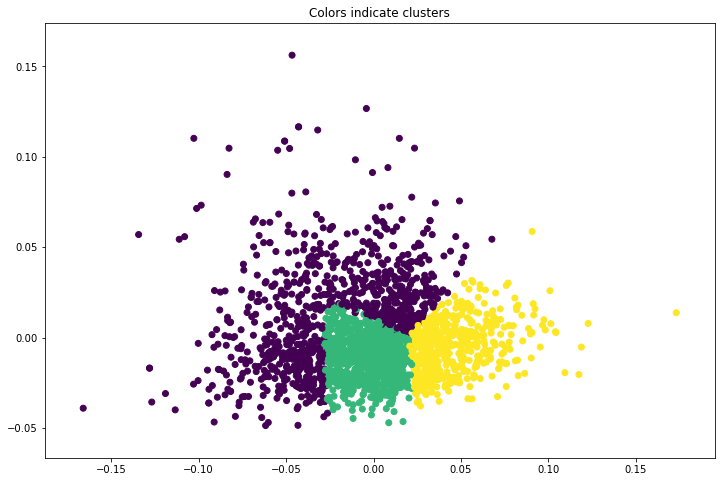

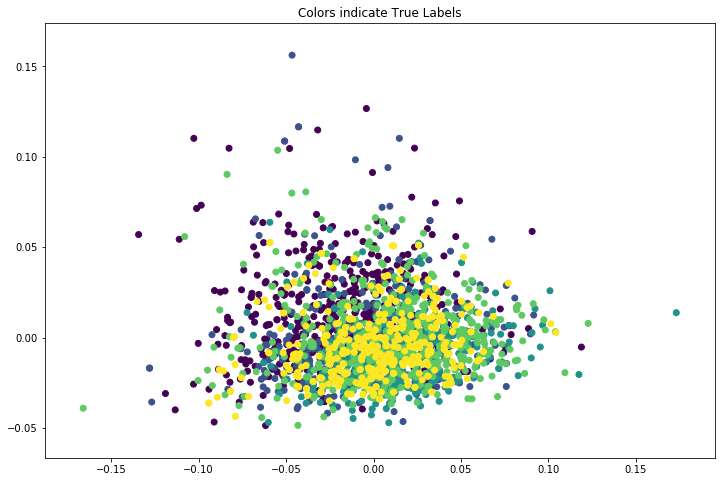

In [273]:
pca = decomposition.PCA(n_components=2)
pca.fit(np.array(X_w2v))
X_2 = pca.transform(X_w2v)

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=df_w2v['predicted_label'])
plt.title("Colors indicate clusters")

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=df_w2v['labels'])
plt.title("Colors indicate True Labels")
#-----------------------------


ValueError: Invalid RGBA argument: 4

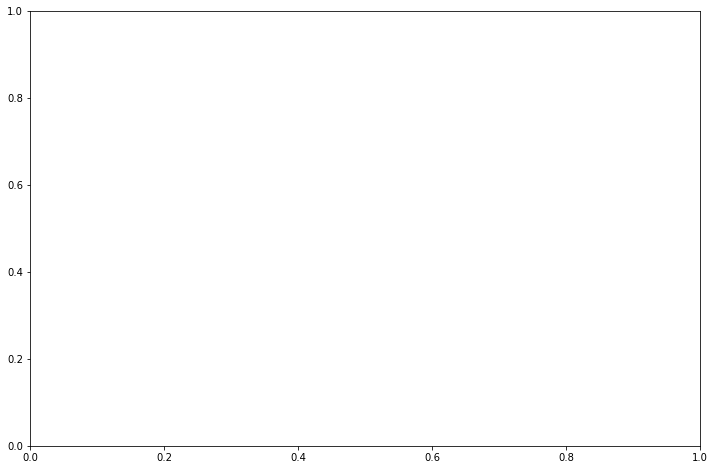

In [226]:
pca = decomposition.PCA(n_components=2)
pca.fit(np.array(X_w2v))
X_2 = pca.transform(X_w2v)

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=df['pred'])
plt.title("Colors indicate clusters")

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=true_labels)
plt.title("Colors indicate True Labels")



In [192]:
#-------------------------------------------tfidf-------------------------------------------------


vectorizer = TfidfVectorizer(max_df=0.25,          # drop words that occur in more than a quarter of the articles
                             min_df=2,             # only use words that appear at least twice
                             stop_words='english', # picking list of stop words
                             lowercase=True,       # convert everything to lower case 
                             use_idf=True,         # use inverse document frequencies in our weighting
                             norm=u'l2',           # Treat longer and shorter paragraphs equally
                             smooth_idf=True       # Prevent divide-by-zero errors
                            )


# Applying the vectorizer
article_list_tfidf = vectorizer.fit_transform(article_list)
print("Number of features: %d" % article_list_tfidf.get_shape()[1])

X_train_tfidf, X_test_tfidf= train_test_split(article_list_tfidf, test_size=0.4, random_state=0)


# Reshape the vectorizer output to be legible 
article_list_tfidf_csr = article_list_tfidf.tocsr()

# number of articles
n = article_list_tfidf_csr.shape[0]

# Making a list of dictionaries, one per article
tfidf_bypara = [{} for _ in range(0,n)]

# List of features
terms = vectorizer.get_feature_names()

# for each article, lists the feature words and their tf-idf scores
for i, j in zip(*article_list_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = article_list_tfidf_csr[i, j]


print('Original article:', article_list[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 17460
Original article: Japan narrowly escapes recession

Japan's economy teetered on the brink of a technical recession in the three months to September, figures show.

Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.

The government was keen to play down the worrying implications of the data. "I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It's painting a picture of a recovery... much patchier

In [193]:
# Viewing the vectorizer output
print(article_list_tfidf_csr)

  (0, 922)	0.0607086500388
  (0, 13732)	0.14260259297
  (0, 2432)	0.0406123712897
  (0, 16954)	0.25570325772
  (0, 12295)	0.231218590396
  (0, 12559)	0.0591641974579
  (0, 12300)	0.224009603054
  (0, 10110)	0.0363958505612
  (0, 7072)	0.039593334585
  (0, 8907)	0.055216840356
  (0, 658)	0.0631989815973
  (0, 100)	0.0712280489631
  (0, 588)	0.0712280489631
  (0, 10458)	0.0296892870557
  (0, 4548)	0.0349546944672
  (0, 5450)	0.0660518823378
  (0, 6480)	0.0296892870557
  (0, 2215)	0.0334343216627
  (0, 8605)	0.0446801285312
  (0, 7209)	0.106812831011
  (0, 2136)	0.0712280489631
  (0, 7757)	0.0594956288298
  (0, 14768)	0.0888813774693
  (0, 8539)	0.151494981611
  (0, 3859)	0.0531327664176
  :	:
  (2222, 5752)	0.0219340313517
  (2222, 5795)	0.0246827724601
  (2222, 15777)	0.0460511794369
  (2222, 8142)	0.0237494955386
  (2222, 7339)	0.0246827724601
  (2222, 1923)	0.0246827724601
  (2222, 8144)	0.0204677346123
  (2222, 3946)	0.0224341155964
  (2222, 17348)	0.0167128118042
  (2222, 2327)	0.01

In [194]:
X_tfidf = article_list_tfidf
X_norm_tfidf = normalize(X_tfidf)
model_tfidf = KMeans(n_clusters=5).fit(X_norm_tfidf)
#model_tfidf_labels = model_tfidf.labels_
prediction_tfidf = model_tfidf.predict(X_norm_tfidf)

In [214]:
df_tfidf = pd.DataFrame()
df_tfidf['pred'] = prediction_tfidf
labels_tfidf = pd.read_csv('bbc_classes.csv')
#labels_tfidf.flatten()
df_tfidf['labels_tfidf'] = labels_tfidf
df_tfidf.head(50)
print(df_tfidf[508:520])

     pred  labels_tfidf
508     1             0
509     1             1
510     1             1
511     0             1
512     0             1
513     0             1
514     0             1
515     0             1
516     0             1
517     0             1
518     0             1
519     3             1


In [215]:
label_map = generate_labels(df_tfidf)
df_tfidf['predicted_label'] = df_tfidf.iloc[:, 0].map(lambda x: label_map[x])
df_tfidf.head(50)

,pred,labels_tfidf,predicted_label
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [216]:
labels = prediction_tfidf
print('Silhouette Score')
print(metrics.silhouette_score(X_norm_tfidf, labels, metric='euclidean'))
array = X_norm_tfidf.toarray()
print('Calinski Harabaz Index')
print(metrics.calinski_harabaz_score(array, labels))
print('Opposite of the value of X on the K-means objective.')
print(model_tfidf.score(X_norm_tfidf))
print('Adjusted Rand Index')
print(metrics.adjusted_rand_score(labels_tfidf, prediction_tfidf))

Silhouette Score
0.0127784772914
Calinski Harabaz Index
14.3051888486
Opposite of the value of X on the K-means objective.
-2124.869451090949
Adjusted Rand Index


ValueError: labels_true must be 1D: shape is (2223, 1)

In [217]:
#y_tfidf = df['pred_tfidf']
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_norm_tfidf, prediction_tfidf, test_size=0.3)

In [218]:
knn_w2v = neighbors.KNeighborsClassifier()
knn_w2v.fit(X_train_w2v, y_train_w2v)
y_pred = knn_w2v.predict(X_test_w2v)
print('Percentage accuracy')
print(knn_w2v.score(X_test_w2v, y_test_w2v))

Percentage accuracy
0.925037481259


In [219]:
knn_w2v = neighbors.KNeighborsClassifier()
knn_w2v.fit(X_train_w2v, y_train_w2v)
y_pred = knn_w2v.predict(X_test_w2v)
print('Percentage accuracy')
print(knn_w2v.score(X_test_w2v, y_test_w2v))

Percentage accuracy
0.925037481259


In [221]:
label_names = generate_label_names(df_tfidf)
df_tfidf['doc_label'] = label_names
df_tfidf.tail()

,pred,labels_tfidf,predicted_label,doc_label
2218,2,4,4,tech
2219,2,4,4,tech
2220,2,4,4,tech
2221,2,4,4,tech
2222,2,4,4,tech


In [224]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_norm_tfidf, labels, test_size=0.1)

In [225]:
knn_tfidf = neighbors.KNeighborsClassifier()
knn_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred = knn_tfidf.predict(X_test_tfidf)
print('Percentage accuracy')
print(knn_w2v.score(X_test_tfidf, y_test_tfidf))

Percentage accuracy


ValueError: kd_tree does not work with sparse matrices. Densify the data, or set algorithm='brute'

In [ ]:
labels = y
print('Silhouette Score')
print(metrics.silhouette_score(X_norm_tfidf, labels, metric='euclidean'))
array = X_norm_tfidf.toarray()
print('Calinski Harabaz Index')
print(metrics.calinski_harabaz_score(array, labels))
print('Opposite of the value of X on the K-means objective.')
print(model_tfidf.score(X_norm_tfidf))
print('Adjusted Rand Index')
print(metrics.adjusted_rand_score(labels_tfidf, y))

In [ ]:
pred_tfidf = prediction_tfidf
labels_tfidf = labels_tfidf


In [276]:
pca = decomposition.PCA(n_components=2)
pca.fit(np.array(X_tfidf))
X_2 = pca.transform(X_tfidf)

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=df_tfidf['predicted_labels'])
plt.title("Colors indicate clusters")

plt.figure(figsize=(12,8))
plt.scatter(X_2[:,0],X_2[:,1],c=df_tfidf['labels_tfidf'])
plt.title("Colors indicate True Labels")

ValueError: setting an array element with a sequence.